In [1]:
from numpy import ndarray
from pandas import read_csv, DataFrame
from matplotlib.figure import Figure
from matplotlib.pyplot import figure, subplots, savefig, show
from dslabs_functions import HEIGHT, plot_multi_scatters_chart

In [2]:
# Figure 15 - Sparsity analysis

file_tag = "cyber_attacks"
filename = "C:\\Users\\LENOVO\\Documents\\Projetos\\Data_science\\telecom_churn_dataset\\Telecom_Customers_Churn.csv"

data: DataFrame = read_csv(filename, na_values=" ")
data = data.dropna()

vars: list = data.columns.to_list()
if [] != vars:
    target = "Churn"

    n: int = len(vars) - 1
    fig: Figure
    axs: ndarray
    fig, axs = subplots(n, n, figsize=(n * HEIGHT, n * HEIGHT), squeeze=False)
    for i in range(len(vars)):
        var1: str = vars[i]
        for j in range(i + 1, len(vars)):
            var2: str = vars[j]
            plot_multi_scatters_chart(data, var1, var2, ax=axs[i, j - 1])
    savefig(f"images/15_{file_tag}_sparsity_study.png")
    show()
else:
    print("Sparsity class: there are no variables.")


In [3]:
# Figure 15 - Sparsity analysis - Part2
if [] != vars:
    target = "Churn"

    n: int = len(vars) - 1
    fig, axs = subplots(n, n, figsize=(n * HEIGHT, n * HEIGHT), squeeze=False)
    for i in range(len(vars)):
        var1: str = vars[i]
        for j in range(i + 1, len(vars)):
            var2: str = vars[j]
            plot_multi_scatters_chart(data, var1, var2, target, ax=axs[i, j - 1])
    savefig(f"images/15_{file_tag}_sparsity_per_class_study.png")
    show()
else:
    print("Sparsity per class: there are no variables.")


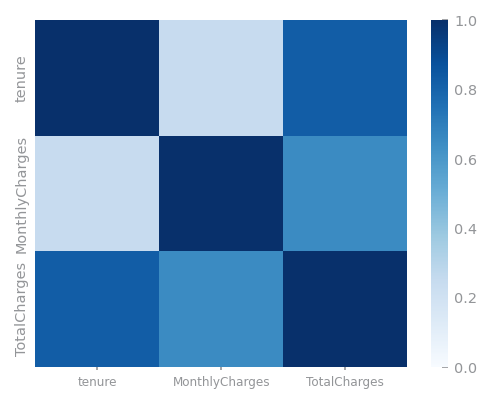

In [4]:
# Figure 17 - Correlation analysis
from pandas import to_numeric
from seaborn import heatmap
from dslabs_functions import get_variable_types

variables_types: dict[str, list] = get_variable_types(data)
numeric: list[str] = variables_types["numeric"]
corr_mtx: DataFrame = data[numeric].corr().abs()

figure()
heatmap(
    abs(corr_mtx),
    xticklabels=numeric,
    yticklabels=numeric,
    annot=False,
    cmap="Blues",
    vmin=0,
    vmax=1,
)
savefig(f"images/17_{file_tag}_correlation_analysis.png")
show()